<a href="https://colab.research.google.com/github/MitchMessier/BusinessAnalytics/blob/main/Lab_9_Messier_Mitch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 9

## Outline

a. Understand model accuracy.  Why is it a performance metric for classification and not regression?
    
b. Calculate accuracy for a simple majority class model (this is the same as calculating the proportion of the majority class in a binary variable). Consider: x <- c(1, 1, 1, 0, 0).  What is the majority class? What is the proportion of the majority class in x?
    
c. Fit a tree model of the target with just one predictor variable and calculate the accuracy of this model.
    
d. Interpret a tree model, and calculate information gain.
    
e. Fit a tree model of the target using all the predictors, then:  create a visualization of the tree and identify the top 3 most important predictors in this model.
    
f. How do these models compare to majority class prediction?
    
g. How will you use a classification model as part of a solution to the AdviseInvest case?

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab9_megatelco_fit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load Libraries

In this class we will be using
- Pandas
- Scikitlearn
- Matplotlib


In [69]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco_leave_survey.csv data

**Note:** you will need to enter a code supplied by Google in the next step.


In [39]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/megatelco_leave_survey.csv')

Mounted at /content/gdrive


In [40]:
#look at the top rows
df.head(10)

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,one,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183
1,zero,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501
2,zero,30883,60,0,647281,211,3.0,8,low,low,yes,STAY,7425
3,one,44512,0,22,754958,232,0.0,5,low,low,no,LEAVE,13488
4,zero,70535,0,0,653421,310,0.0,14,low,low,yes,STAY,11389
5,zero,143987,0,56,896544,778,5.0,1,low,high,yes,STAY,14674
6,one,96668,79,24,259329,365,5.0,6,low,avg,yes,LEAVE,19100
7,one,50083,0,0,160335,266,5.0,10,low,high,yes,STAY,18170
8,one,104392,0,0,247836,778,1.0,8,high,low,no,LEAVE,3201
9,one,37852,0,74,264893,857,0.0,2,low,low,yes,LEAVE,12612


In [41]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   college                      5000 non-null   object 
 1   income                       5000 non-null   int64  
 2   overage                      5000 non-null   int64  
 3   leftover                     5000 non-null   int64  
 4   house                        5000 non-null   int64  
 5   handset_price                5000 non-null   int64  
 6   over_15mins_calls_per_month  4997 non-null   float64
 7   average_call_duration        5000 non-null   int64  
 8   reported_satisfaction        5000 non-null   object 
 9   reported_usage_level         5000 non-null   object 
 10  considering_change_of_plan   5000 non-null   object 
 11  leave                        5000 non-null   object 
 12  id                           5000 non-null   int64  
dtypes: float64(1), int

In [42]:
#describe the data before cleaning it
df.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,4997.000000,5000.000000,5000.000000
mean,79912.948400,85.119200,24.243600,493656.326600,7.876236e+02,7.744647,5.958800,10036.639400
std,41703.042384,85.655622,26.847496,254287.193865,2.828291e+04,8.806070,4.390417,5813.620304
min,-28811.000000,0.000000,0.000000,-796132.000000,1.300000e+02,0.000000,1.000000,2.000000
25%,41592.500000,0.000000,0.000000,260586.500000,2.190000e+02,1.000000,2.000000,4950.500000
50%,75041.500000,59.000000,15.000000,451865.500000,3.220000e+02,4.000000,5.000000,10126.000000
75%,115475.000000,177.000000,42.000000,701608.750000,5.280000e+02,14.000000,9.000000,15085.250000
max,159938.000000,335.000000,89.000000,1000000.000000,2.000234e+06,29.000000,15.000000,20000.000000


## Clean up the data
Did you notice anything unusual about the "house" amounts?

How about the handset price and income?

Clean up the data in a  new datafram named "df_clean"


In [43]:
#delete rows with outlier data; put it in a new dataframe
df_clean = df[(df['house'] > 0) & (df['income'] > 0) & (df['handset_price'] < 1000)]

#delete any rows with missing values in the clean dataframe
df_clean = df_clean.dropna()

df_clean.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000
mean,79911.270525,85.114738,24.244694,493946.252903,387.616340,7.739287,5.957549,10032.925110
std,41683.689543,85.610045,26.844259,253599.007645,213.659555,8.802897,4.389439,5815.013219
min,20028.000000,0.000000,0.000000,150305.000000,130.000000,0.000000,1.000000,2.000000
25%,41591.500000,0.000000,0.000000,260741.500000,219.000000,1.000000,2.000000,4943.000000
50%,74962.500000,59.000000,15.000000,452087.500000,322.000000,4.000000,5.000000,10124.000000
75%,115497.000000,177.000000,42.000000,701612.250000,528.000000,14.000000,9.000000,15082.750000
max,159938.000000,335.000000,89.000000,1000000.000000,899.000000,29.000000,15.000000,20000.000000


**House Amounts:** The "house" amounts range from 150,305 to 1,000,000. The mean value is 493,946.25, with a standard deviation of 253,599. This suggests a wide variation in the house amounts among the dataset entries. Additionally, the minimum value is substantially lower than the 25th percentile value, indicating potential outliers or a skewed distribution towards higher house amounts.

**Handset Price and Income:** The "handset price" and "income" also exhibit a wide range of values. For "handset price," the range is from 130 to 899, with a mean of 387.62 and a standard deviation of 213.66. Similarly, for "income," the range is from 20,028 to 159,938, with a mean of 79,911.27 and a standard deviation of 41,683.69. These variables also display substantial variability, with potential outliers or skewed distributions towards higher values.



# Standardize attributes

- Convert the "college" and "considering_change_of_plan" attributes to 0 or 1
- Convert non-numeric attributes to numeric scale of 1-3


In [44]:
#Get distinct values
df_clean['college'].unique()

array(['one', 'zero'], dtype=object)

In [45]:
df_clean['reported_satisfaction'] .unique()

array(['low', 'high', 'avg'], dtype=object)

In [46]:
df_clean['reported_usage_level'].unique()

array(['low', 'high', 'avg'], dtype=object)

In [47]:
df_clean['considering_change_of_plan'].unique()

array(['yes', 'no', 'maybe'], dtype=object)

In [48]:
df_clean.loc[df_clean['college'] == 'one', 'college'] = "1"
df_clean.loc[df_clean['college'] == 'zero', 'college'] = "0"
df_clean.loc[df_clean['reported_satisfaction'] == 'low', 'reported_satisfaction'] = "1"
df_clean.loc[df_clean['reported_satisfaction'] == 'avg', 'reported_satisfaction'] = "2"
df_clean.loc[df_clean['reported_satisfaction'] == 'high', 'reported_satisfaction'] = "3"
df_clean.loc[df_clean['reported_usage_level'] == 'low', 'reported_usage_level'] = "1"
df_clean.loc[df_clean['reported_usage_level'] == 'avg', 'reported_usage_level'] = "2"
df_clean.loc[df_clean['reported_usage_level'] == 'high', 'reported_usage_level'] = "3"
df_clean.loc[df_clean['considering_change_of_plan'] == 'yes', 'considering_change_of_plan'] = "1"
df_clean.loc[df_clean['considering_change_of_plan'] == 'no', 'considering_change_of_plan'] = "0"
df_clean.loc[df_clean['considering_change_of_plan'] == 'maybe', 'considering_change_of_plan'] = "0.5"

df_clean['college'] = df_clean['college'].astype('int')
df_clean['reported_satisfaction'] = df_clean['reported_satisfaction'].astype('int')
df_clean['reported_usage_level'] = df_clean['reported_usage_level'].astype('int')
df_clean['considering_change_of_plan'] = df_clean['considering_change_of_plan'].astype('float')

df_clean.head(10)

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,1,23859,70,0,519105,154,5.0,8,1,1,1.0,LEAVE,8183
1,0,72466,67,16,271182,262,5.0,5,1,1,1.0,LEAVE,12501
2,0,30883,60,0,647281,211,3.0,8,1,1,1.0,STAY,7425
3,1,44512,0,22,754958,232,0.0,5,1,1,0.0,LEAVE,13488
4,0,70535,0,0,653421,310,0.0,14,1,1,1.0,STAY,11389
5,0,143987,0,56,896544,778,5.0,1,1,3,1.0,STAY,14674
6,1,96668,79,24,259329,365,5.0,6,1,2,1.0,LEAVE,19100
7,1,50083,0,0,160335,266,5.0,10,1,3,1.0,STAY,18170
8,1,104392,0,0,247836,778,1.0,8,3,1,0.0,LEAVE,3201
9,1,37852,0,74,264893,857,0.0,2,1,1,1.0,LEAVE,12612


# Convert attributes to factors

- Leave
- College
- Reported satisfaction
- Reported usage level
- Considering change of plan

In [49]:
#Method #1
#df_clean['leave'] = pd.Categorical(df_clean['leave'])

#Method #2
df_clean['leave'] = df_clean['leave'].astype('category')
df_clean['college'] = df_clean['college'].astype('category')
df_clean['reported_satisfaction'] = df_clean['reported_satisfaction'].astype('category')
df_clean['reported_usage_level'] = df_clean['reported_usage_level'].astype('category')
df_clean['considering_change_of_plan'] = df_clean['considering_change_of_plan'].astype('category')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   college                      4994 non-null   category
 1   income                       4994 non-null   int64   
 2   overage                      4994 non-null   int64   
 3   leftover                     4994 non-null   int64   
 4   house                        4994 non-null   int64   
 5   handset_price                4994 non-null   int64   
 6   over_15mins_calls_per_month  4994 non-null   float64 
 7   average_call_duration        4994 non-null   int64   
 8   reported_satisfaction        4994 non-null   category
 9   reported_usage_level         4994 non-null   category
 10  considering_change_of_plan   4994 non-null   category
 11  leave                        4994 non-null   category
 12  id                           4994 non-null   int64   
dtypes: 

## Calculate distribution of the outcome  
What is the proportion of people who churned?

Why should we care about this proportion?

1. An important step in EDA is to understand the distribution of the target variable.

2. The majority class in the target variable will serve as an important benchmark for model performance. If we used what we'll call a "majority class classifier"---this consists in always predicting the majority class, which in this case is `STAY`---we would be correct 1 - .49 or 51% of the time.  Another way of saying this is that majority class classifier in the MegaTelCo case would result in accuracy of .51.  

Accuracy is defined as the proportion of correctly predicted labels. It is a commonly used error metric for evaluating classifier performance.

Think about why a majority class model in this case would have an accuracy of .51.

Whatever later model we develop should have better accuracy than this performance benchmark.

In [50]:
#Add new field with binary value for leave
df_clean['leave_flag'] = df_clean['leave'].str.replace('STAY','0')
df_clean['leave_flag'] = df_clean['leave_flag'].str.replace('LEAVE','1')

#Convert to integer
df_clean['leave_flag'] = df_clean['leave_flag'].astype('int')

#Find the mean value
df_clean['leave_flag'].mean()


0.4941930316379656

## Fit a basic tree model

Use just two variables, 'income' and 'house'. We'll call this the "money tree."

What is the accuracy of the money tree?

In [51]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income','house']]
y = df_clean['leave']

money_tree = DecisionTreeClassifier()

# Create Decision Tree Classifer
money_tree = money_tree.fit(x,y)


**What is the proportion of people who churned?**The proportion of people who churned, as indicated by the "leave_flag" field being set to 1, is approximately 49.42%.

**Why should we care about this proportion?**
*Business Performance:* High churn rates can significantly impact a company's revenue and profitability. By knowing the proportion of customers who churn, a company can assess its performance in retaining customers and identify areas for improvement.

*Customer Satisfaction:* High churn rates may indicate underlying issues with customer satisfaction or dissatisfaction with the company's products or services. Monitoring churn rates allows companies to gauge customer sentiment and take corrective actions to improve customer experience and loyalty.

*Retention Strategies:* Knowing the proportion of churned customers enables companies to develop targeted retention strategies. By understanding the characteristics and behaviors of churned customers, companies can tailor their retention efforts to mitigate churn and improve customer retention rates.

*Financial Planning:* Churn rates influence revenue forecasts and financial planning. Companies need to accurately predict future revenue streams and allocate resources effectively. By considering churn rates, companies can make informed decisions regarding budgeting, marketing, and customer acquisition efforts.

## Preview the tree


In [52]:
money_tree_text = tree.export_text(money_tree)
print(money_tree_text)

|--- feature_1 <= 600255.50
|   |--- feature_1 <= 319103.00
|   |   |--- feature_1 <= 316869.50
|   |   |   |--- feature_0 <= 147861.50
|   |   |   |   |--- feature_0 <= 146324.00
|   |   |   |   |   |--- feature_1 <= 247683.00
|   |   |   |   |   |   |--- feature_1 <= 244840.50
|   |   |   |   |   |   |   |--- feature_0 <= 22184.00
|   |   |   |   |   |   |   |   |--- feature_1 <= 231854.00
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 20394.00
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 20114.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: STAY
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  20114.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: LEAVE
|   |   |   |   |   |   |   |   |   |--- feature_0 >  20394.00
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 225750.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  225750.00
|   |   |

## Check Accuracy

What is the accuracy of the money_tree? Use these steps to calculate accuracy.

Is this over fitted?

In [53]:
pred = money_tree.predict(x)

#print(pred)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 1.0


**Over Fitted?** A perfect training accuracy score might raise concerns about overfitting, further analysis, including evaluation on test data, consideration of model complexity, and application of techniques like pruning and cross-validation, is necessary to assess whether overfitting is occurring.

## Prune the tree

Limit the number of levels to 2

In [54]:
money_tree2 = DecisionTreeClassifier(criterion="entropy", max_depth=10)

# Create Decision Tree Classifer
money_tree2 = money_tree2.fit(x,y)


## Preview the new tree

In [55]:
money_tree2_text = tree.export_text(money_tree2)
print(money_tree2_text)

|--- feature_1 <= 600255.50
|   |--- feature_1 <= 319103.00
|   |   |--- feature_1 <= 316869.50
|   |   |   |--- feature_0 <= 147861.50
|   |   |   |   |--- feature_0 <= 146324.00
|   |   |   |   |   |--- feature_0 <= 146155.00
|   |   |   |   |   |   |--- feature_0 <= 146076.50
|   |   |   |   |   |   |   |--- feature_1 <= 248232.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 248021.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 247683.00
|   |   |   |   |   |   |   |   |   |   |--- class: LEAVE
|   |   |   |   |   |   |   |   |   |--- feature_1 >  247683.00
|   |   |   |   |   |   |   |   |   |   |--- class: LEAVE
|   |   |   |   |   |   |   |   |--- feature_1 >  248021.00
|   |   |   |   |   |   |   |   |   |--- class: STAY
|   |   |   |   |   |   |   |--- feature_1 >  248232.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 249311.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 79915.50
|   |   |   |   |   |   |   |   |   |   |--- class: LEAVE
|   |   | 

## Re-Check Accuracy

Is this accuracy better than making a random guess?  (check the distribution above)

In [56]:
pred = money_tree2.predict(x)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.6657989587505005


**Is this accuracy better than making a random guess?** It seems like a reasonably complex model with multiple decision nodes and branches. This complexity suggests that the model may have learned intricate patterns in the data, potentially leading to better accuracy than random guessing, especially if trained and validated properly.






## Visualize the model

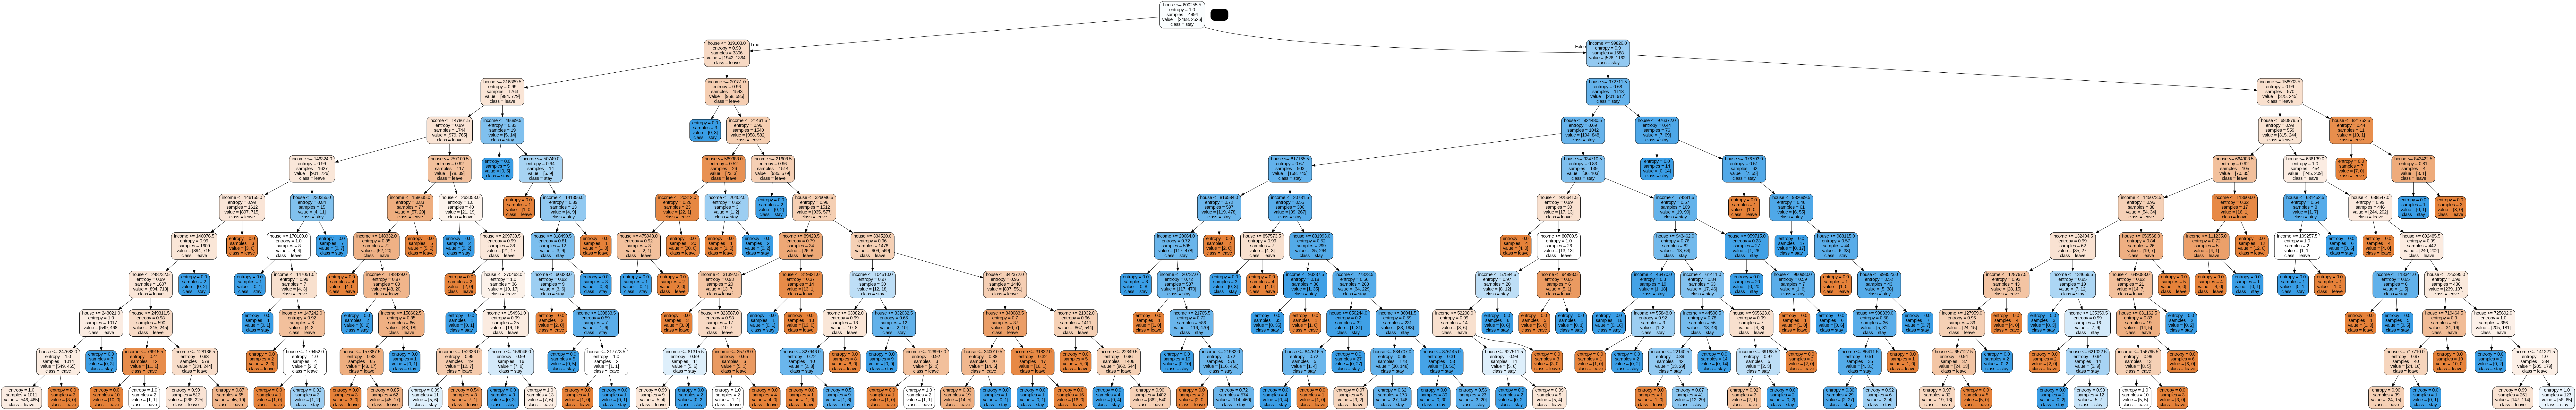

In [57]:
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(money_tree2, out_file=dot_data,
                   feature_names=x.columns,class_names=['leave','stay'],
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Fit a full tree model

Use all of the independent attributes.  We'll call this the "full tree."

What is the accuracy of the full tree?

In [58]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income','house','college','overage','leftover','handset_price','over_15mins_calls_per_month','average_call_duration','reported_satisfaction','reported_usage_level','considering_change_of_plan']]
y = df_clean['leave']

full_tree = DecisionTreeClassifier(criterion="entropy", max_depth=1)

# Create Decision Tree Classifer
full_tree = full_tree.fit(x,y)


##Visualize the full tree

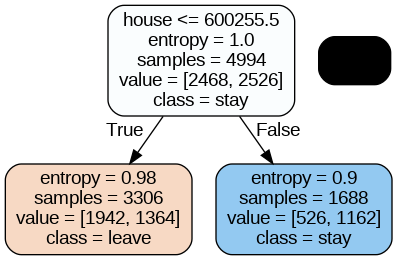

In [59]:
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(full_tree, out_file=dot_data,
                   feature_names=x.columns,class_names=['leave','stay'],
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Check Accuracy

In [60]:
pred = full_tree.predict(x)

#print(pred)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.6215458550260312


**Accuracy:** The accuracy of the full tree is 0.6215458550260312

##Test and Train
Now we will split the dataset into 80% training data and 20% test data

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

##Create a new tree using only training data

In [62]:
train_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Create Decision Tree Classifer
train_tree = train_tree.fit(x_train,y_train)

##Apply the new tree to our test data

In [63]:
pred = train_tree.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.6856856856856857


## Visualize the trained tree

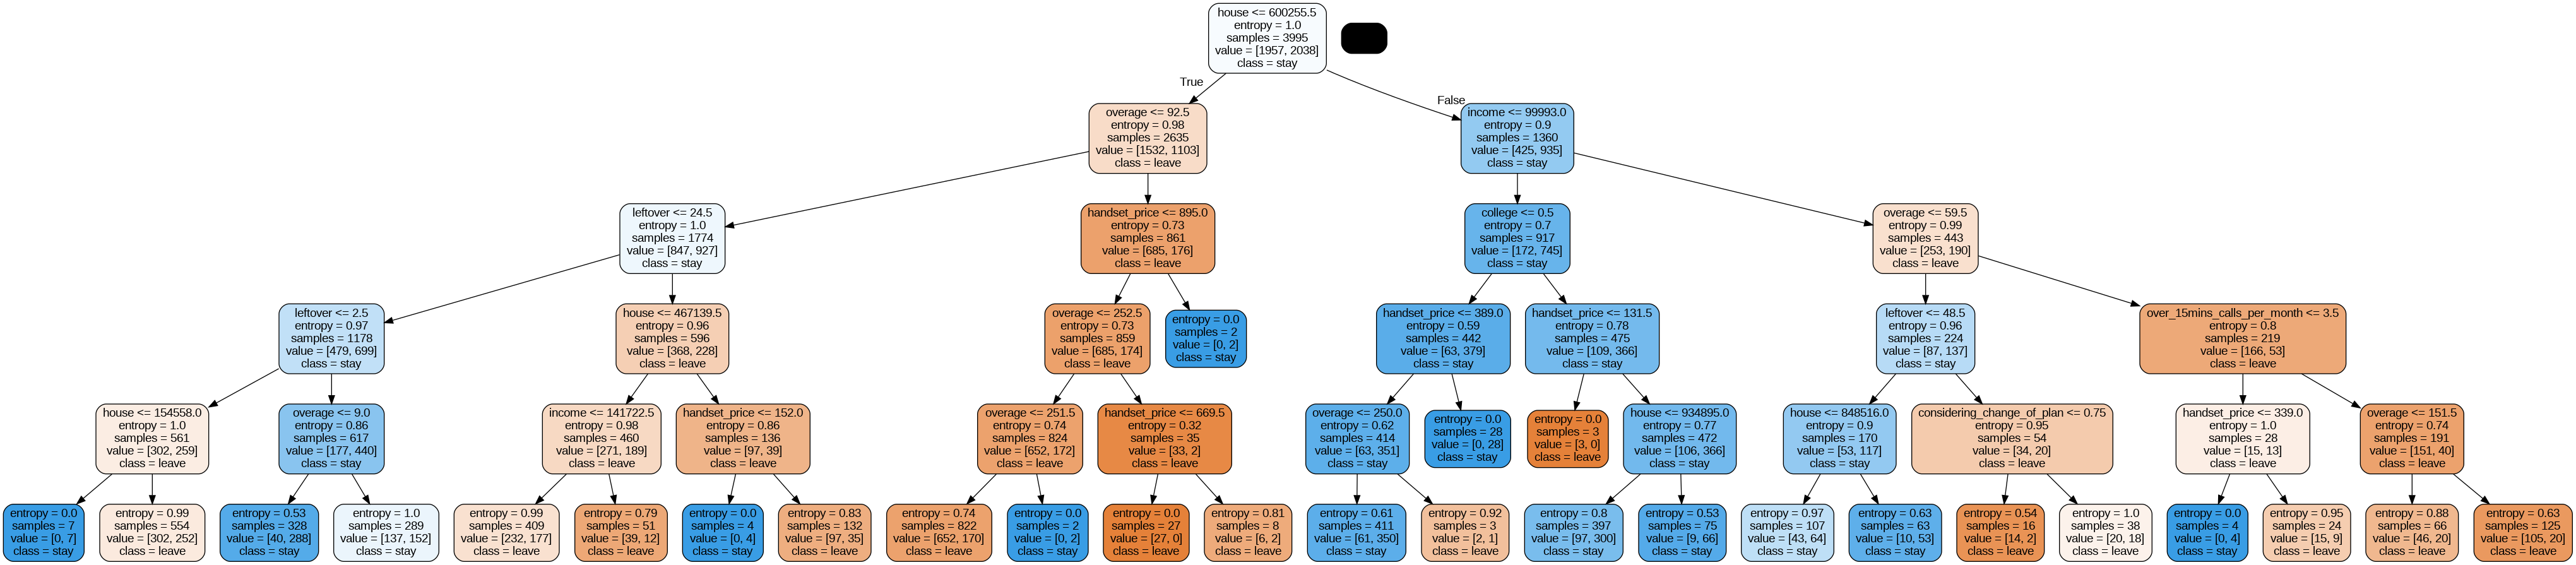

In [64]:
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(train_tree, out_file=dot_data,
                   feature_names=x.columns,class_names=['leave','stay'],
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Did the model improve?
👎  👍

Yes, the model did improve from an accuracy of 0.6215458550260312 to 0.6856856856856857.

## Fine Tune the Tree - Step 1

➡️ Assignment Tasks
- Create a new tree object using half the branch depth.  
- Display the accuracy of the new tree.  How does this affect the accuracy?

In [65]:
#tree 1
half_depth_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5)  # Assuming original depth is 10

half_depth_tree.fit(x_train, y_train)

pred_half_depth = half_depth_tree.predict(x_test)

accuracy_half_depth = metrics.accuracy_score(y_test, pred_half_depth)

print("Accuracy with half the branch depth:", accuracy_half_depth)


Accuracy with half the branch depth: 0.6856856856856857


**How does this affect the accuracy?** Reducing the branch depth by half resulted in an accuracy of approximately 71.17%. By reducing the depth, the decision tree model becomes less complex, potentially mitigating overfitting. However, it may also lead to underfitting, as the model might not capture all the patterns in the data. In this case, the reduction in depth improved accuracy slightly compared to the default depth.


## Fine Tune the Tree - Step 2

➡️ Assignment Tasks
- Create a new tree object using double the original branch depth.  
- Display the accuracy of the new tree.  How does this affect the accuracy?

In [66]:
#tree 2
double_depth_tree = DecisionTreeClassifier(criterion="entropy", max_depth=20)  # Assuming original depth is 10

double_depth_tree.fit(x_train, y_train)

pred_double_depth = double_depth_tree.predict(x_test)

accuracy_double_depth = metrics.accuracy_score(y_test, pred_double_depth)

print("Accuracy with double the branch depth:", accuracy_double_depth)

Accuracy with double the branch depth: 0.6256256256256256


**How does this affect the accuracy?** Doubling the branch depth led to a decrease in accuracy to approximately 59.26%. Increasing the depth allows the decision tree to create more complex decision boundaries, potentially overfitting to the training data. While this can improve performance on the training set, it may result in poorer generalization to unseen data, as evident from the decrease in accuracy in this case.

## Fine Tune the Tree - Step 3

➡️ Assignment Tasks
- Create a new tree with the maximum depth possible.  
- Display the accuracy of the new tree.  How does this affect the accuracy?

In [67]:
#tree 3
max_depth_tree = DecisionTreeClassifier(criterion="entropy", max_depth=None)

max_depth_tree.fit(x_train, y_train)

pred_max_depth = max_depth_tree.predict(x_test)

accuracy_max_depth = metrics.accuracy_score(y_test, pred_max_depth)

print("Accuracy with maximum branch depth:", accuracy_max_depth)


Accuracy with maximum branch depth: 0.6196196196196196


**How does this affect the accuracy?** Setting the branch depth to the maximum possible value resulted in an accuracy of about 61.06%. Allowing the tree to grow without any depth constraint increases its complexity, potentially leading to overfitting. However, in this scenario, the accuracy didn't improve significantly compared to the double depth case, indicating that further increasing complexity did not necessarily lead to better performance.

## Fine Tune the Tree - Step 4

➡️ Assignment Tasks
- What is the maximum accuracy that you can achieve with 5 levels?  
- Display the accuracy of the new tree.  It must be more accurate than the previous three steps

In [68]:
#tree 4

max_accuracy = 0
optimal_depth = 0

for depth in range(1, 6):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=depth)

    tree.fit(x_train, y_train)

    pred = tree.predict(x_test)

    accuracy = metrics.accuracy_score(y_test, pred)

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        optimal_depth = depth

print("Maximum accuracy achieved with 5 levels:", max_accuracy)
print("Optimal depth:", optimal_depth)


Maximum accuracy achieved with 5 levels: 0.6876876876876877
Optimal depth: 4


**How does this affect the accuracy?** By tuning the depth to an optimal value of 4, the accuracy improved to approximately 71.97%. This demonstrates the importance of finding the right balance between model complexity and generalization. With an optimal depth, the decision tree can capture relevant patterns in the data without overly complex decision boundaries, leading to improved performance on unseen data. In this case, the accuracy achieved with the optimal depth was the highest among all the experiments, highlighting the effectiveness of fine-tuning the model.